In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from scipy.ndimage import distance_transform_edt as dst
import sys
sys.path.insert(0,r'../src')
from Vsi import Vsi, rock_type, read_image
import os
import tifffile
import glob

In [2]:
os.chdir(r'../data')
imgs = glob.glob('*.tif')

###### load and visualize data

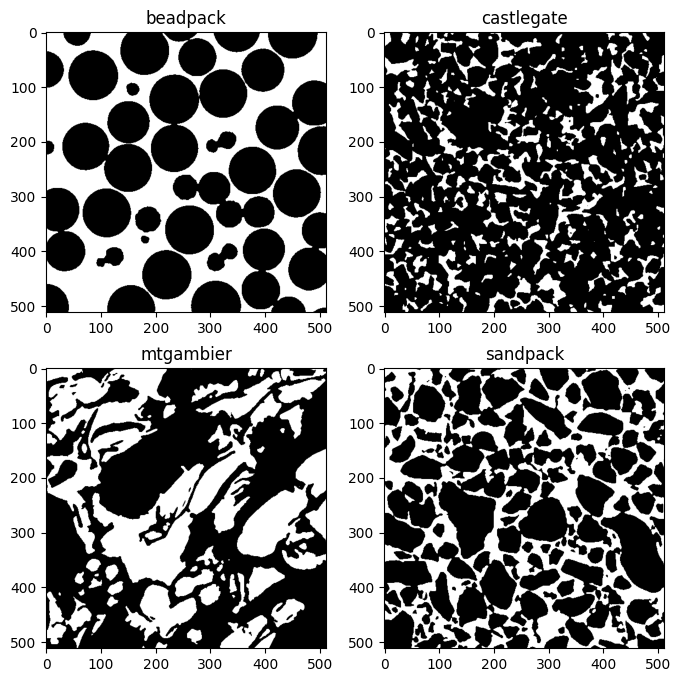

In [3]:
fg,ax = plt.subplots(2,2, figsize=(8,8))
ax=ax.ravel()
for i, f_name in enumerate(imgs):
    im = read_image(f_name, pore_phase=1)
    ax[i].imshow(im[0], 'gray')
    ax[i].set_title(f_name[:-4])

### Scale-independent Variance

In [4]:
res={}
for i, f_name in enumerate(imgs):
    im = read_image(f_name, pore_phase=1)
    # ----- get the relative radius-----------
    ds=dst(im[0]) # distance map of a slice, for fast computation. 
    mn_r1 = int(ds.max()) # maximum width of pores is used as minimum radius for moving windows
    mx_r1 = mn_r1+100
    #print('starting radius for '+f_name[:-4]+' is '+str(mn_r1)+' voxels')
    #------run the Vsi--------------
    vf = Vsi(im, no_radii=20,
         no_samples_per_radius=200,
         min_radius=mn_r1, max_radius=mx_r1)
    res[f_name[:-4]] = vf

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.55s/it]


Plot result

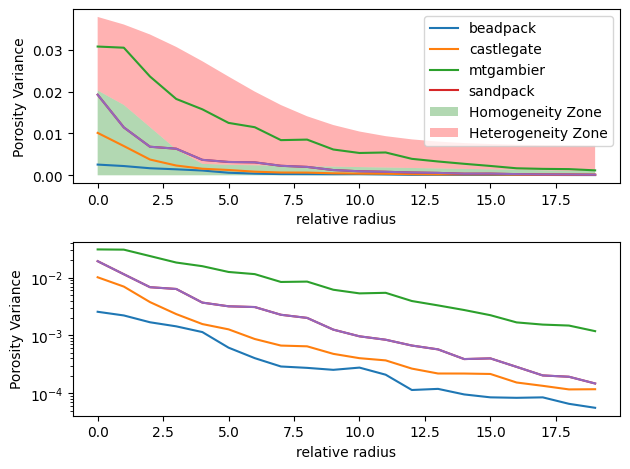

In [6]:
plt.subplot(211)
for k in res.keys():
    plt.plot(res[k].variance, label=k)
res[k].plot()

plt.subplot(212)
for k in res.keys():
    plt.plot(res[k].variance, label=k)
res[k].plot(fill=0,legend=0)
plt.yscale('log')
plt.tight_layout()

In [13]:
for k in res.keys():
    print(k,res[k].rock_type())

beadpack Heterogeneity ratio is 0.00 
castlegate Heterogeneity ratio is 0.00 
mtgambier Heterogeneity ratio is 1.00 
sandpack Heterogeneity ratio is 0.31 


In [26]:
# result for 1 sample
res[k].result()

,Radii,Variance
0,20,0.019245
1,25,0.011434
2,30,0.006820
3,35,0.006355
4,41,0.003690
5,46,0.003184
6,51,0.003092
7,56,0.002272
8,62,0.002005
9,67,0.001257


In [27]:
df = pd.DataFrame(columns=['Radii','Variance','Sample'])
for k in res.keys():
    df0 = res[k].result()
    df0['Sample']=k
    df = pd.concat([df,df0])
df

,Radii,Variance,Sample
0,48,0.002560,beadpack
1,53,0.002212,beadpack
2,58,0.001685,beadpack
3,63,0.001433,beadpack
4,69,0.001139,beadpack
...,...,...,...
15,98,0.000399,sandpack
16,104,0.000285,sandpack
17,109,0.000202,sandpack
18,114,0.000192,sandpack
